In [61]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\telecom\\Telco-Customer-Churn.csv')

The dataset provided is from a telecom company which has a record of customer information and their churn. 

Our goal is to predict the customers who might stop using their services.

In [52]:
head(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [62]:
str(df)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [63]:
library(dplyr)
df=select(df,-customerID)

Removed Identity Variables

In [64]:
df$SeniorCitizen=factor(df$SeniorCitizen)

Making SeniorCitizen a Factor

In [65]:
str(df)

'data.frame':	7043 obs. of  20 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","No internet service",..: 1 3 1 3 1 3 1 1 3 1 ...
 $ TechSupport     : Factor w/ 3 levels "No","No intern

# EDA

In [66]:
library(ggplot2)
library('Amelia')

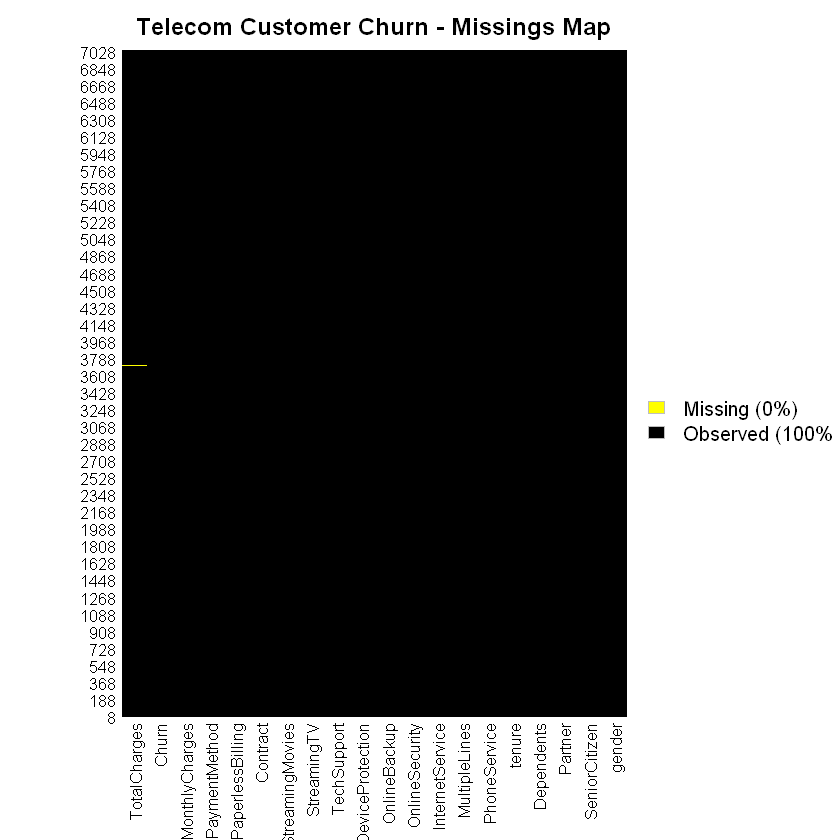

In [67]:
missmap(df,main="Telecom Customer Churn - Missings Map",col=c("yellow","black"),legend=TRUE)

Warning message:
"Removed 11 rows containing non-finite values (stat_bin)."

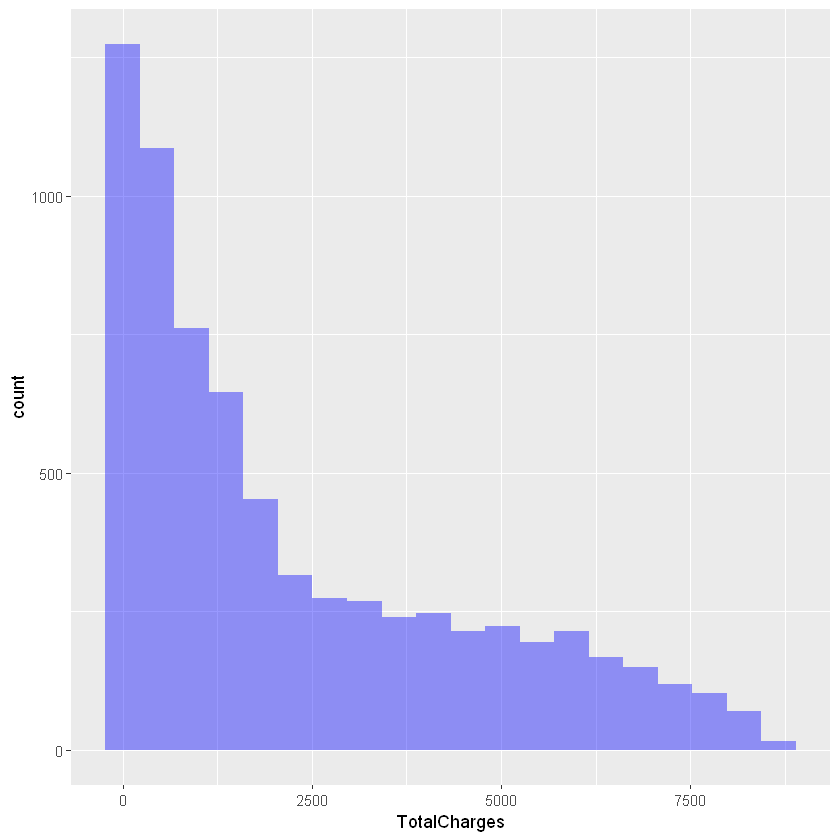

In [68]:
ggplot(df,aes(TotalCharges))+geom_histogram(fill='blue',bins=20,alpha=0.4)

Since,there are lot of data already available and most of totalcharges is 0 ,we can replace the missing values with zero

In [69]:
df[is.na(df)==TRUE]=0

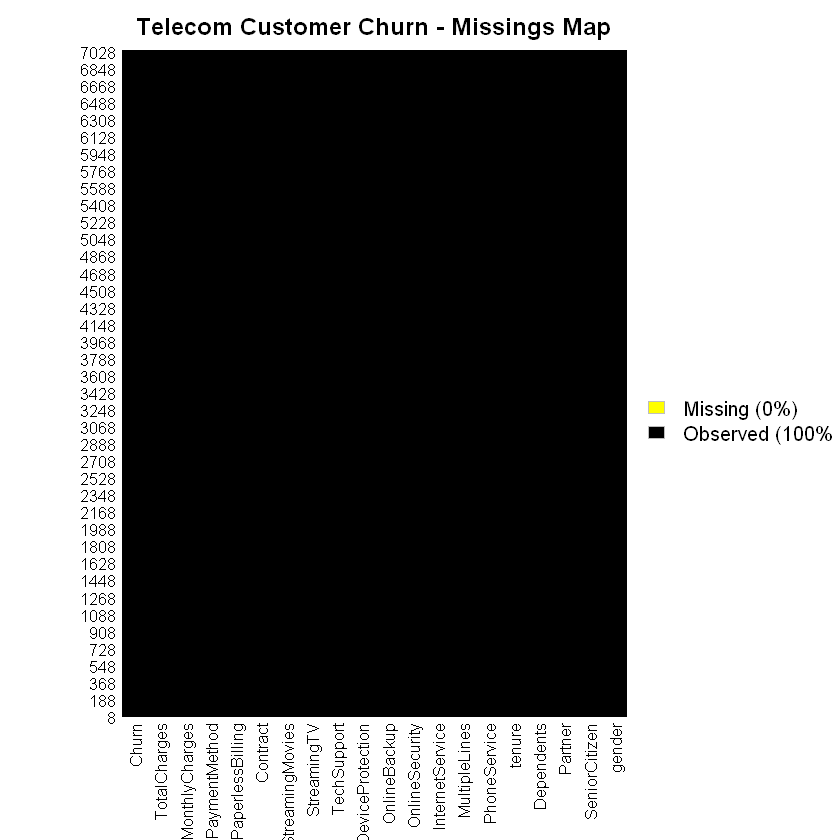

In [70]:
missmap(df,main="Telecom Customer Churn - Missings Map",col=c("yellow","black"),legend=TRUE)

## Splitting Data

In [73]:
library(caTools)

set.seed(101) 

sample = sample.split(df$Churn, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

## APPLYING DECISION TREE MODEL

In [74]:
library(rpart)

In [75]:
tree <- rpart(Churn ~.,method='class',data = train)

In [76]:
tree.preds <- predict(tree,test)

In [77]:
head(tree.preds)

,No,Yes
3,0.4369748,0.56302521
4,0.9356414,0.06435863
6,0.2925373,0.70746269
14,0.5911111,0.40888889
16,0.9356414,0.06435863
17,0.9356414,0.06435863


In [78]:
tree.preds=as.data.frame(tree.preds)

joiner=function(x){
    if(x>=0.5){
        return(1)
    }
    else{
        return(0)
    }
}

In [79]:
tree.preds$Churn <- sapply(tree.preds$Yes,joiner)

In [80]:
head(tree.preds)

,No,Yes,Churn
3,0.4369748,0.56302521,1
4,0.9356414,0.06435863,0
6,0.2925373,0.70746269,1
14,0.5911111,0.40888889,0
16,0.9356414,0.06435863,0
17,0.9356414,0.06435863,0


In [81]:
table(tree.preds$Churn,test$Churn)

   
      No  Yes
  0 1333  233
  1  219  328

In [82]:
TN=1333
FN=233
FP=219
TP=328

1333 correctly predicted Not Churn

233 incorrectly predicted Not Churn

219 incorrectly predicted Churn

328 correctly predicted  Churn

In [83]:
ACC=(TP+TN)/(TN+FN+FP+TP)
ACC

[1] 0.7860861

78% of the time correctly predicted whether the customer is Churn or Not Churn

In [84]:
ERR=(FP+FN)/(TN+FN+FP+TP)
ERR

[1] 0.2139139

21% of the time incorrectly predicted whether the customer is Churn or Not Churn

## Decision Tree

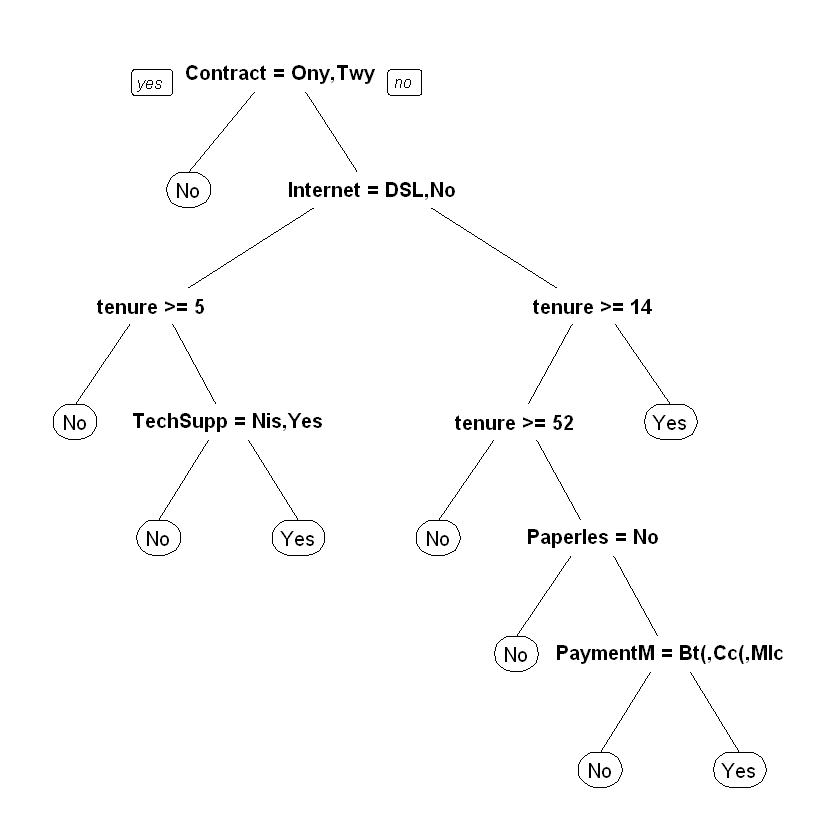

In [85]:
library(rpart.plot)
prp(tree)

If the Contract is for 1 or 2 year then the customer will not churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure>=5 then the customer will not churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure<5 and Techsupport is there or no internet service then the customer will not churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure<5 and Techsupport is not there  then the customer will churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure<14 then the customer will  churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure>=14 and tenure<52 then the customer will not churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure>=14 and tenure>=52 and If its not paperless then the customer will not churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure>=14 and tenure>=52 and If its paperless and the payment is (Bank Transfer,Mailed Check...) then the customer will not churn

If the Contract is not for 1 or 2 year and the internet connection is not there or DSL and the tenure>=14 and tenure>=52 and If its paperless and the payment not (Bank Transfer,Mailed Check...) then the customer will churn

## AUC-ROC Curve

Setting levels: control = 1, case = 2
Setting direction: controls < cases


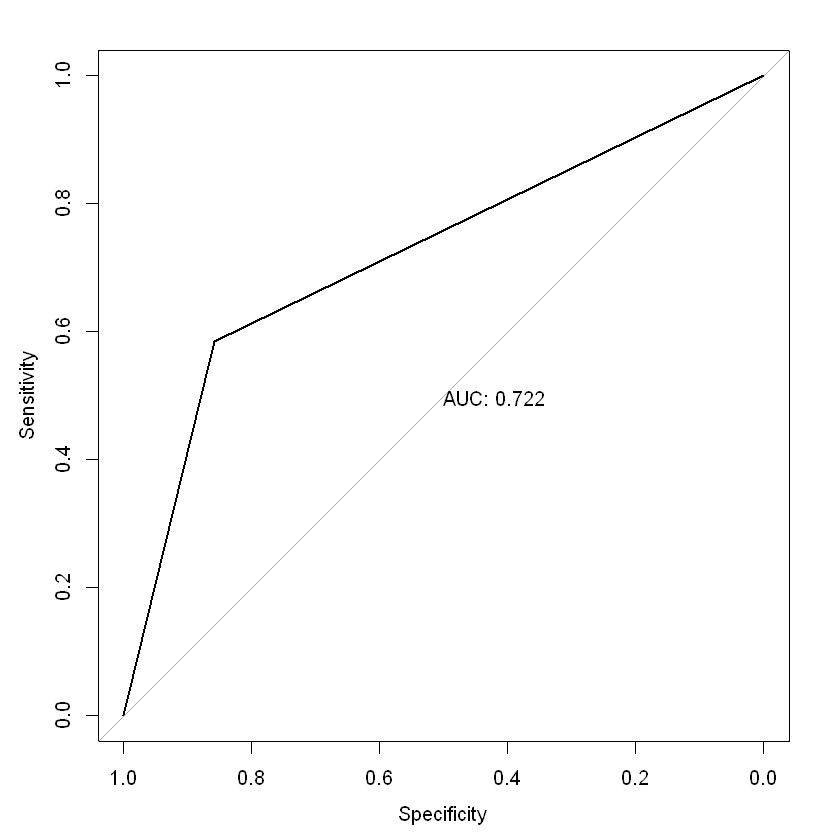

In [115]:
library(pROC)
test_roc=roc(test$Churn~tree.preds$Churn,plot=TRUE,print.auc=TRUE)

This Model has 72% AUC

This model is good at distingushing between Churn and Not Churn

## APPLYING RANDOM FOREST MODEL

In [117]:
library(randomForest)

In [118]:
rf.model=randomForest(Churn~.,data=train,importance=TRUE)

In [119]:
p=predict(rf.model,test)

In [120]:
table(p,test$Churn)

     
p        1    2
  No  1367  262
  Yes  185  299

In [3]:
TN=1367
FN=262
FP=185
TP=299

1367 correctly predicted Not Churn


262 incorrectly predicted Not Churn



185 incorrectly predicted Churn



299 correctly predicted Churn

In [4]:
ACC=(TP+TN)/(TN+FN+FP+TP)
ACC

[1] 0.7884524

78% of the time correctly predicted whether the college is Churn or Not Churn

In [5]:
ERR=(FP+FN)/(TN+FN+FP+TP)
ERR

[1] 0.2115476

21% of the time incorrectly predicted whether the college is Churn or Not Churn

## AUC-ROC Curve

In [125]:
p=as.numeric(p)
test$Churn=as.numeric(test$Churn)

Setting levels: control = 1, case = 2
Setting direction: controls < cases


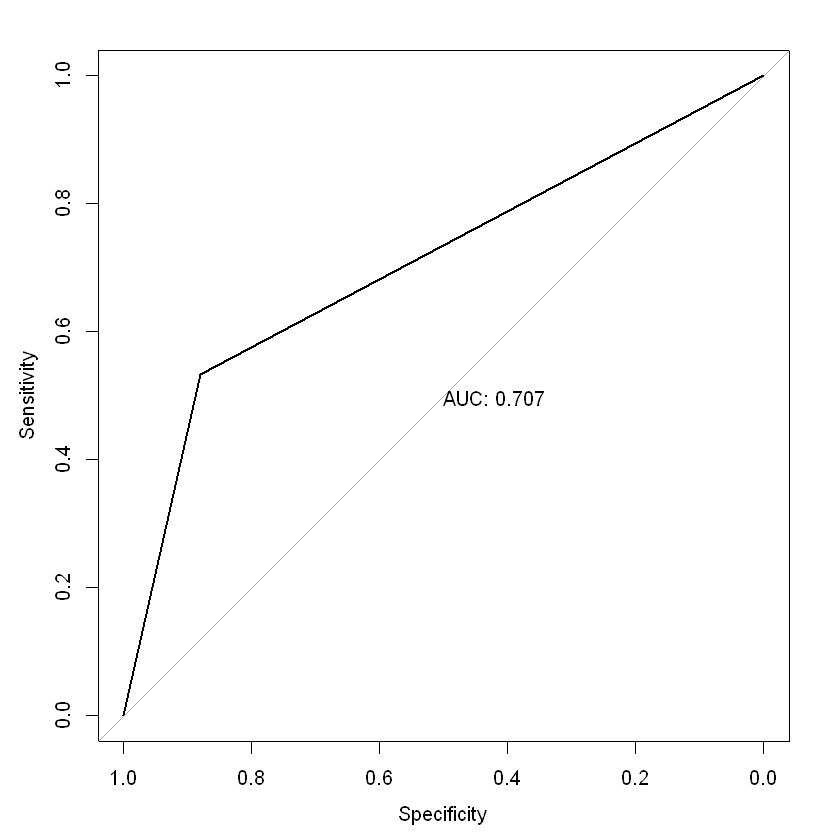

In [126]:
test_roc=roc(test$Churn~p,plot=TRUE,print.auc=TRUE)

This model has 70% AUC

This model is good at distingushing between Churn and Not Churn

## COMAPRISON

Here both decision tree and random forest gives similar results